## Two sample Z-test on Tips Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats import weightstats
import scipy.stats as stats

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
tips = sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [11]:
df = tips[['tip','time']]

In [18]:
din = df[df['time'] == 'Dinner']

In [23]:
lun =  df[df['time'] == 'Lunch']

In [26]:
lun['tip'].mean()

2.728088235294118

In [27]:
din['tip'].mean()

3.102670454545454

In [47]:
weightstats.ztest(lun['tip'],din['tip'])

(-1.9062569301202392, 0.05661687925222567)

As p-value is greater than 0.056.

We can conclude that there is no significant difference between 
tips given at dinner and lunch. 

The tips given are more or less same at any time of the day (lunch or dinner).

In [29]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [30]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


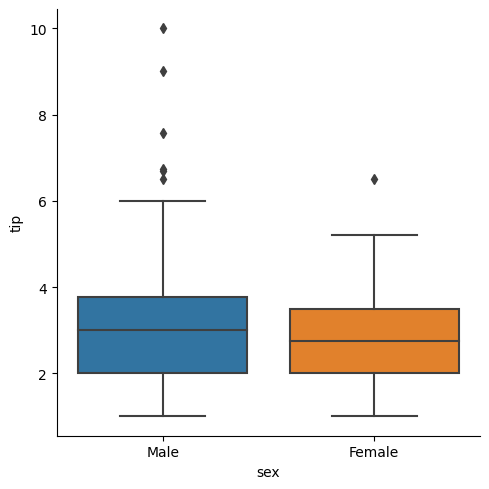

In [33]:
sns.catplot(data=tips,x='sex',y='tip',kind='box')

In [43]:
male_tip = tips[tips['sex']=='Male']['tip']
female_tip = tips[tips['sex']=='Female']['tip']

In [45]:
weightstats.ztest(male_tip,female_tip,alternative='two-sided')

(1.3878597054212687, 0.1651797698624794)